In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import struct

import cartopy
from cartopy import crs as ccrs
import matplotlib 
from matplotlib import pyplot as plt
import os
from os.path import join, exists
from os import mkdir
import scipy
import netCDF4
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import pandas as pd
import matplotlib.path as mpath
from matplotlib.colors import TwoSlopeNorm 

time_scale=86400/2/np.pi
length_scale=6370*1000
PSI_scale=length_scale**2/time_scale

with open("/scratch/hz1994/blocking/data_MMmodel/filepath.txt","r") as fi:
    for ln in fi:
        if ln.startswith("dimensionalized_filepath"):
            dim_path=ln.strip().split('\t')[1]
        if ln.startswith("TMindex_filepath"):
            TMindex_path=ln.strip().split('\t')[1]  
        if ln.startswith("nondimensionalized_filepath"):
            nondim_path=ln.strip().split('\t')[1]
        if ln.startswith("DGindex_filepath"):
            DGindex_path=ln.strip().split('\t')[1]  
        if ln.startswith("fig_filepath" ):
            fig_path=ln.strip().split('\t')[1]  
print(dim_path)
print(nondim_path)
print(TMindex_path)
print(DGindex_path)
print(fig_path)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.5

/ext3/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/scratch/hz1994/blocking/data_MMmodel/dim/
/scratch/hz1994/blocking/data_MMmodel/nondim/
/scratch/hz1994/blocking/data_MMmodel/TMindex/
/scratch/hz1994/blocking/data_MMmodel/DGindex/
/scratch/hz1994/blocking/data_MMmodel/fig_MMmodel/


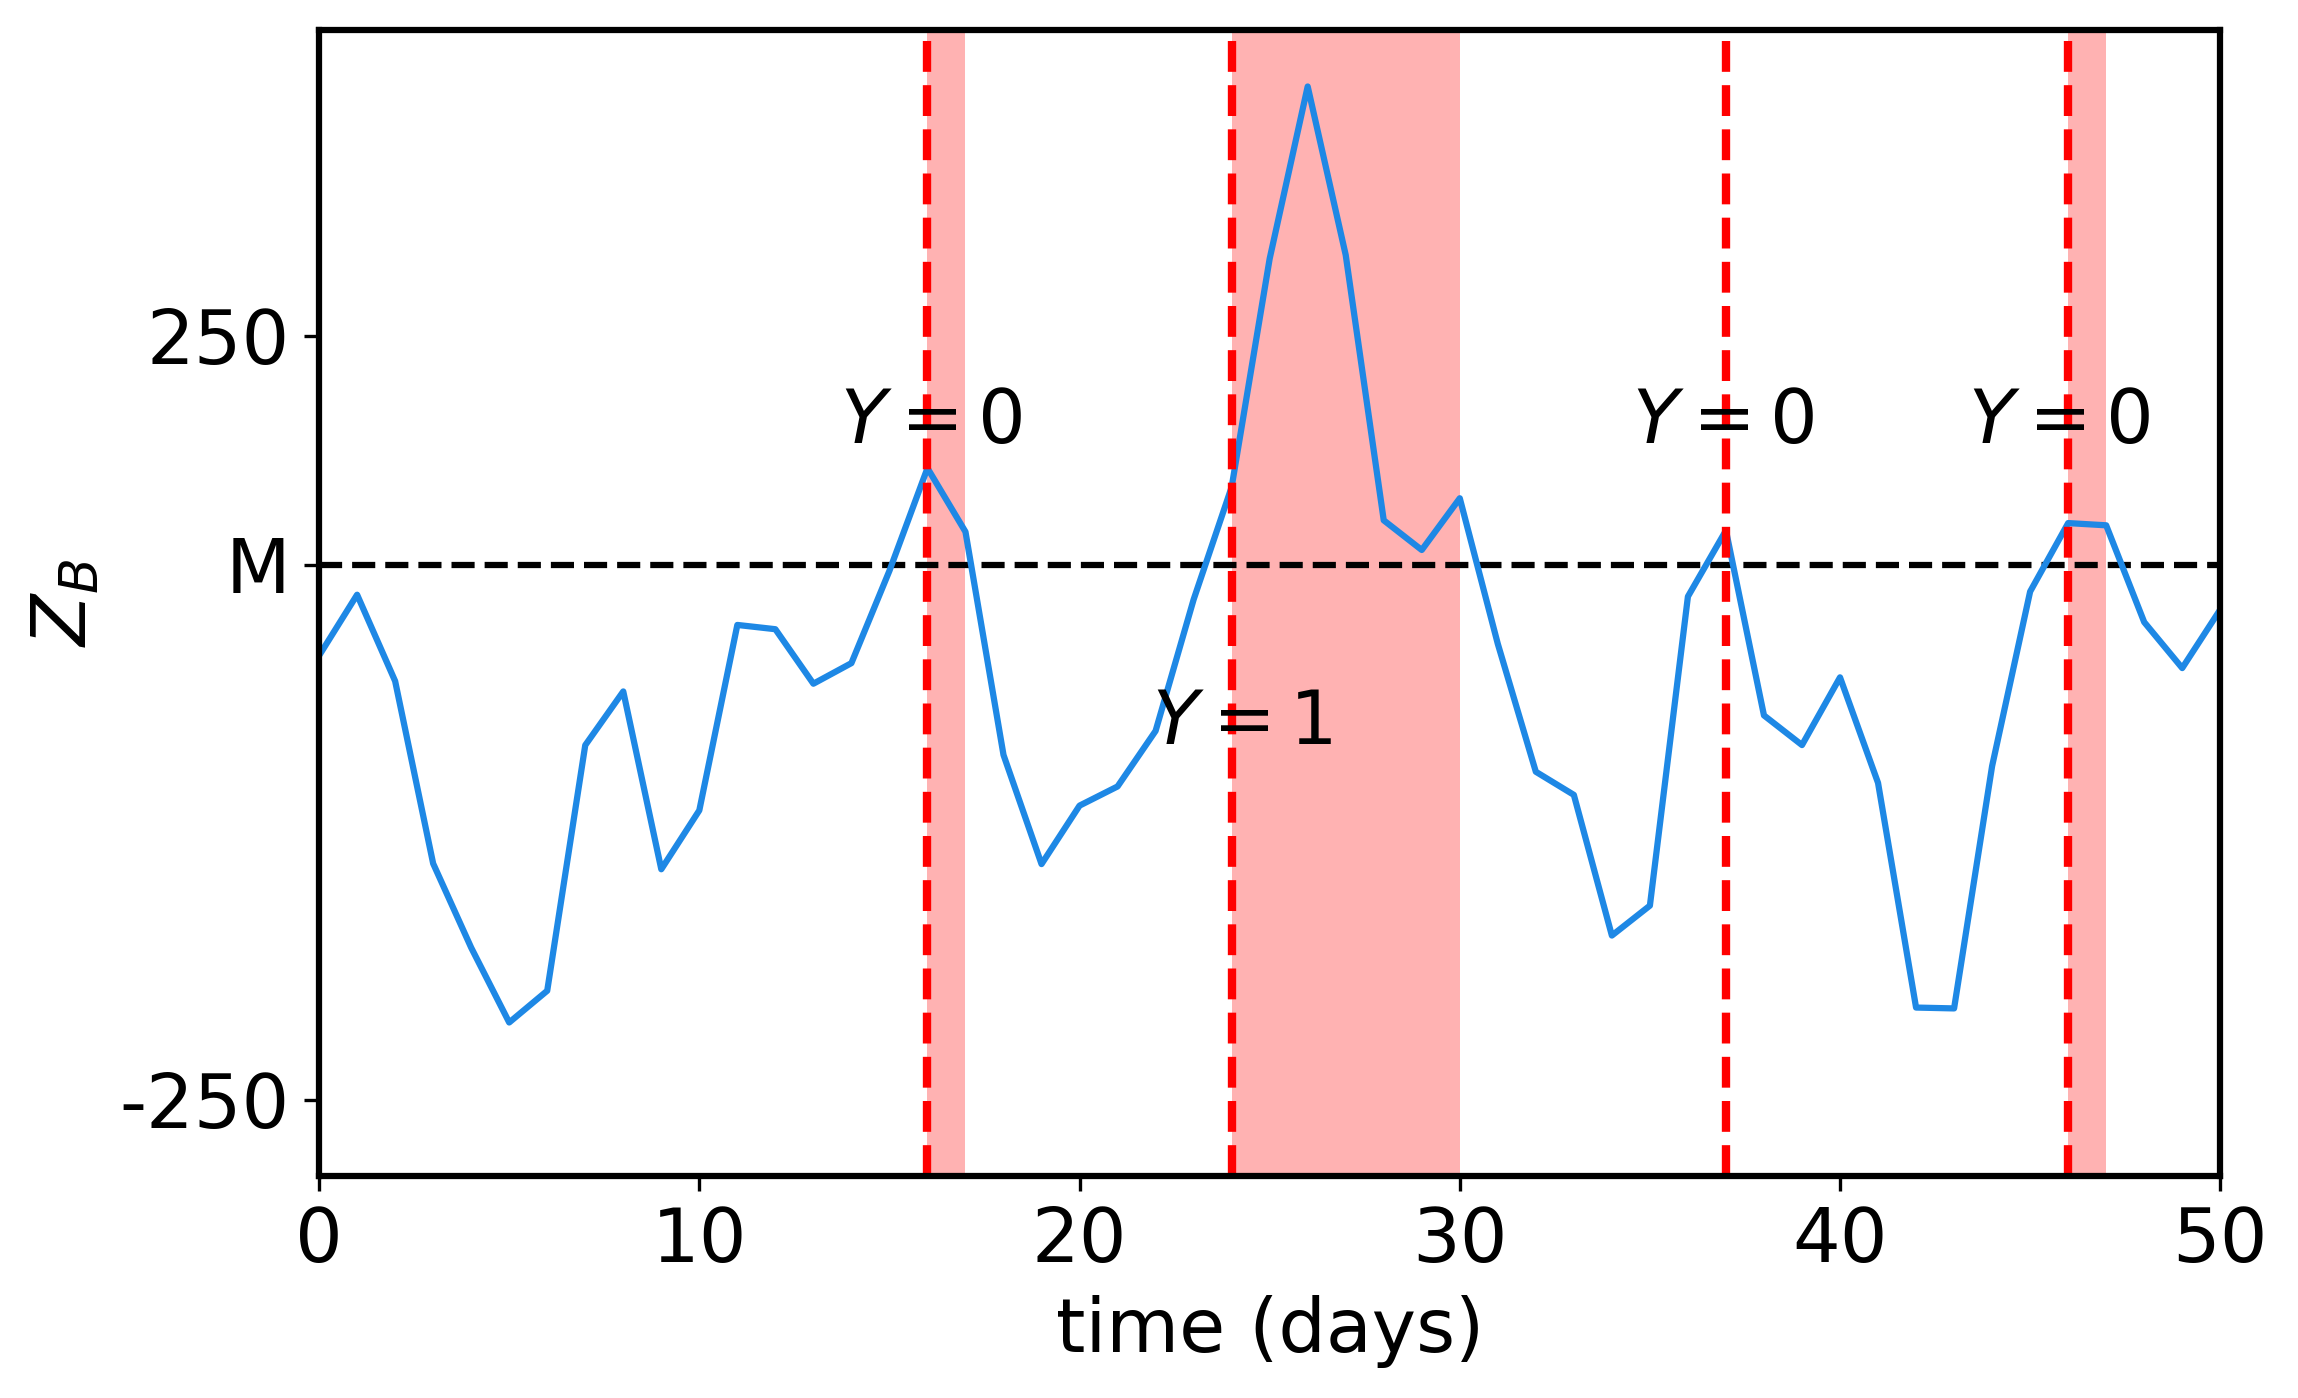

In [2]:
Tk=xr.open_dataarray(DGindex_path+"Atl_Tk_1250k_lowpass3dys.nc")
zprime=xr.open_dataarray(dim_path+"Atl_zprime_1250k_lowpass3dys.nc")

M=100
T=5
color2='#D81B60'
color1='#1E88E5'
color3='#FFC107'
fig,ax=plt.subplots(figsize=[8,5])
t1=10320
t2=10371

ax.axhline(y=100,linestyle='--',color='k')
ax.plot(zprime[t1:t2],color=color1)

ind=np.where(Tk[t1:t2]==1)[0]
# ax.plot(ind,ind*0+M,marker="*", markersize=12,color=color3)
# ax.plot(ind+4,(ind+4)*0+M,'*',markersize=12,color=color2)


for i in ind:
    T0=np.where(Tk[t1:t2]==0)[0]
    j=T0[np.argmax(T0>i)]
    ax.axvspan(i,j-1, alpha=0.3, color='red', lw=0)
    ax.axvline(i, color='red', linestyle='--', lw=2)
plt.annotate(r"$Y=0$", [0.35,0.65], xycoords='figure fraction', va='center')
plt.annotate(r"$Y=1$", [0.48,0.45], xycoords='figure fraction', va='center')
plt.annotate(r"$Y=0$", [0.68,0.65], xycoords='figure fraction', va='center')
plt.annotate(r"$Y=0$", [0.82,0.65], xycoords='figure fraction', va='center')


ax.set_ylim([-300,450])
ax.set_yticks([-250,100,250])
ax.set_yticklabels(['-250','M','250'])

ax.set_xlim([0,50])
ax.set_ylabel(r"$Z_B$")
# ax.set_ylabel(r"$Z-\overline{Z}$")
ax.set_xlabel("time (days)")
fig.tight_layout()
fig.savefig("Fig4_time_seq.png", dpi=200,  bbox_inches="tight")